In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore',category = FutureWarning)
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

In [2]:
os.listdir()

['.DS_Store',
 'PIMA_Diabetes_Classification.ipynb',
 '.ipynb_checkpoints',
 'diabetes.csv']

In [3]:
#Load data
df = pd.read_csv("diabetes.csv")

### Basics

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [10]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

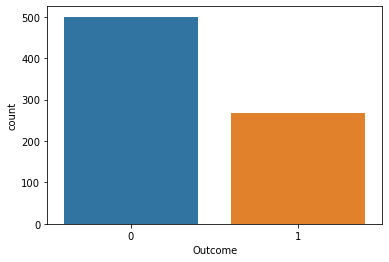

In [11]:
sns.countplot(x = 'Outcome',data = df)

The data has 9 features and 768 observations. There are no missing values and no duplicate rows. But found 0 in some 
of the columns where 0 is not possible. It might be because 0 was filled in place of null values. All 8 independent
variables are numerical and the target variable is binary. Pregnancies has 17 unique values which can be cosidered ordinal. The data is also unbalanced where the number of people without diabetes are nearly double the people with diabetes.

### EDA

In [12]:
#Univariate Data Analysis

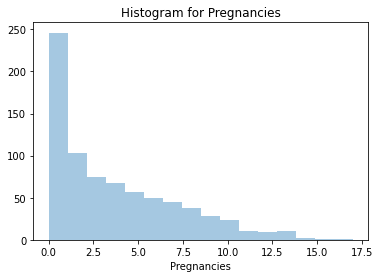

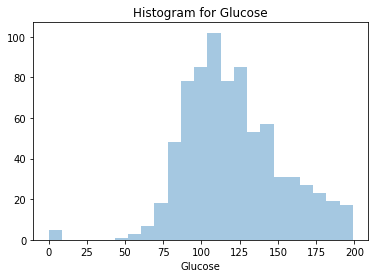

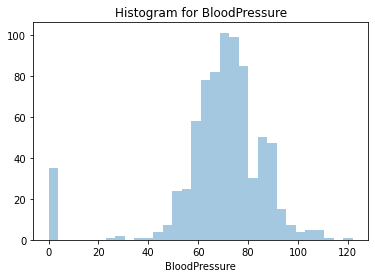

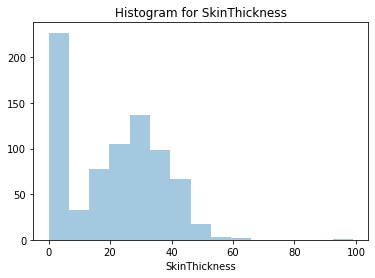

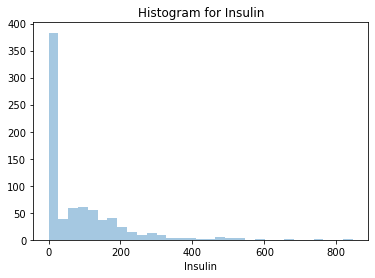

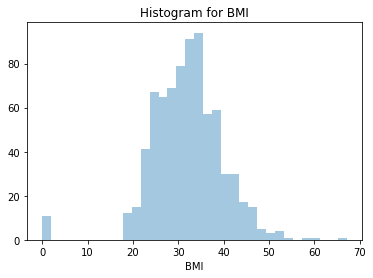

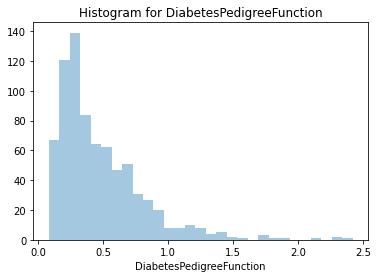

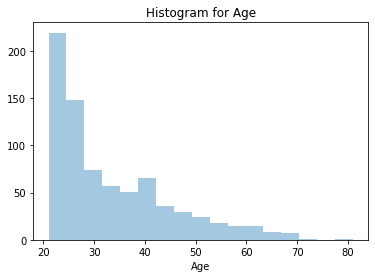

In [13]:
#Histogram
for feature in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
                'DiabetesPedigreeFunction','Age']:
    sns.distplot(df[feature],kde =False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

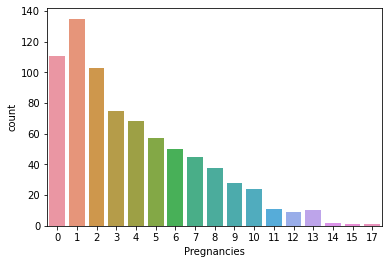

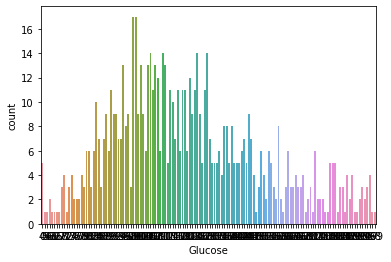

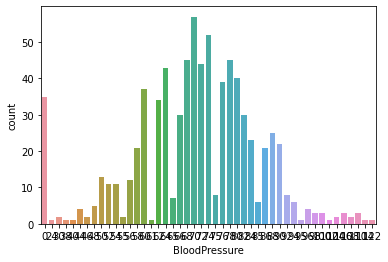

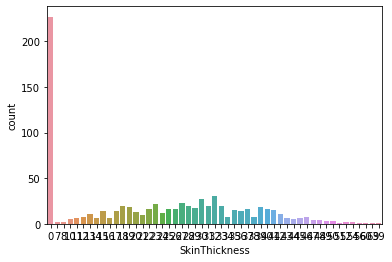

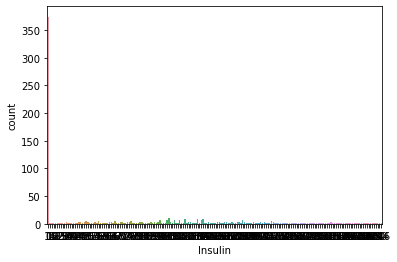

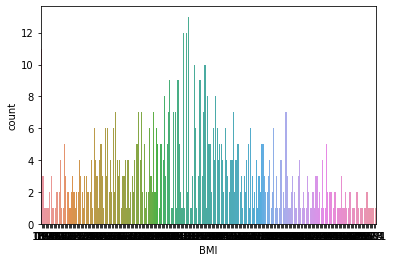

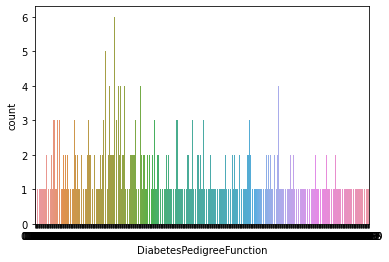

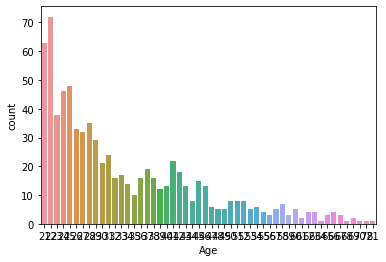

In [14]:
for col in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    sns.countplot(x = df[col], data = df)
    plt.show()

Pregnancies, Age are Right Skewed. Some features like Glucose, BP, Skin Thickness, Insulin, BMI cannot be zero. They are null values which should undergo data cleaning.

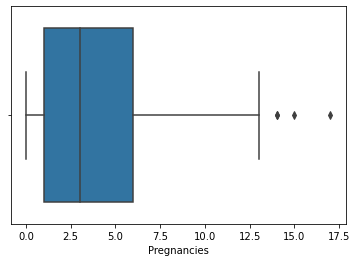

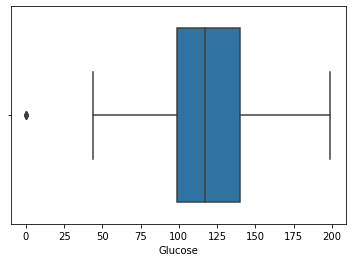

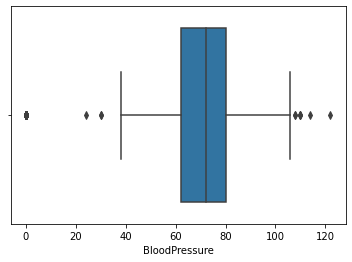

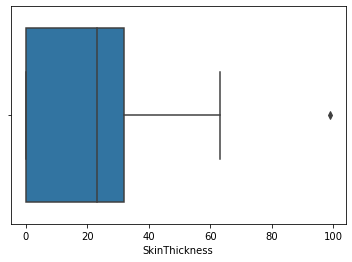

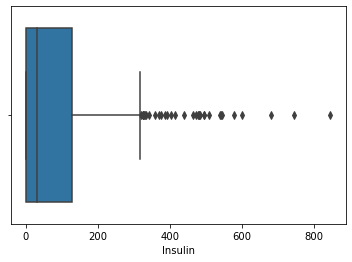

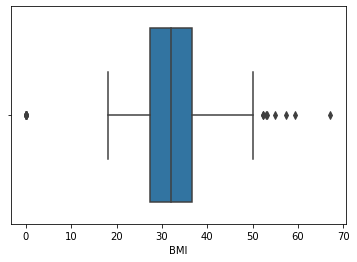

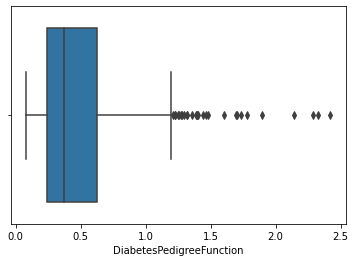

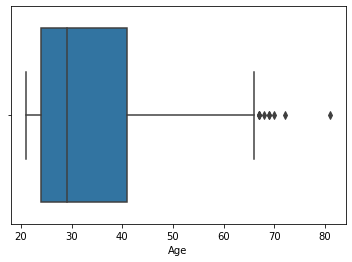

In [15]:
#Boxplot
for feature in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
                'DiabetesPedigreeFunction','Age']:
    sns.boxplot(df[feature])
    plt.show()

In [16]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


From above data, Glucose and Insulin can be good predictors for Output. 

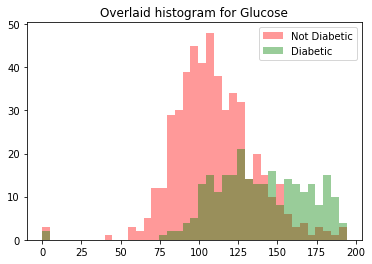

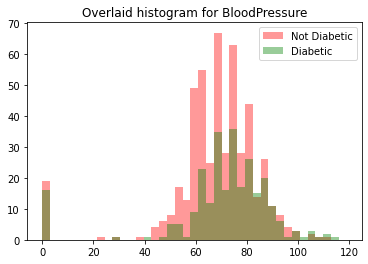

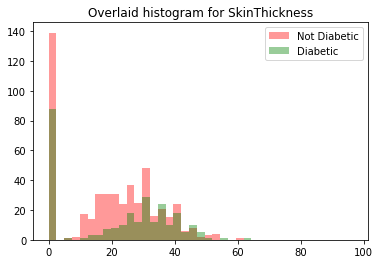

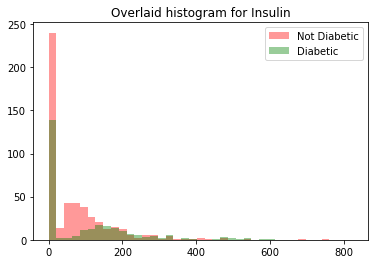

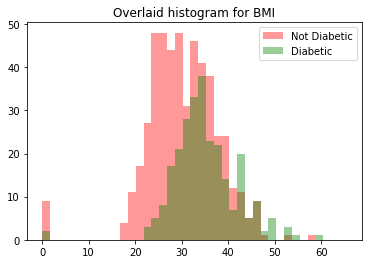

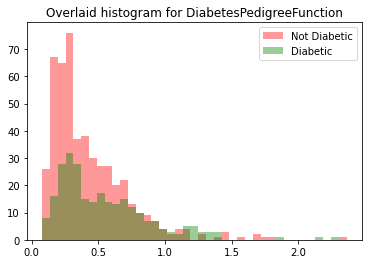

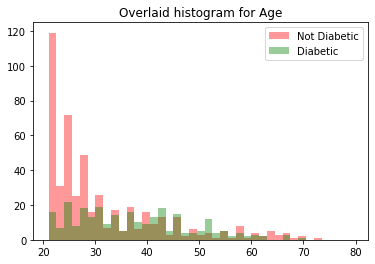

In [17]:
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    not_diabeteic = list(df[df['Outcome']==0][i].dropna())
    diabetic = list(df[df['Outcome']==1][i].dropna())
    xmin = min(min(not_diabeteic),min(diabetic))
    xmax = max(max(not_diabeteic),max(diabetic))
    width = (xmax-xmin)/40
    sns.distplot( not_diabeteic,color = 'r', kde = False, bins = np.arange(xmin,xmax,width))
    sns.distplot(diabetic,color = 'g', kde = False, bins = np.arange(xmin,xmax,width))
    plt.legend(['Not Diabetic','Diabetic'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

(0.0, 1.0)

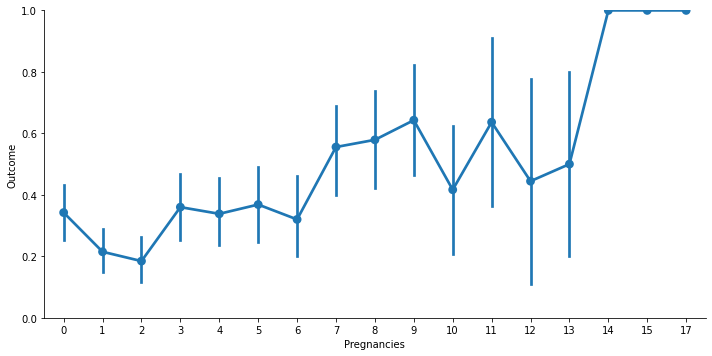

In [18]:
#Plot categorical features
sns.catplot(x = 'Pregnancies', y = 'Outcome', data =df ,kind = 'point' ,aspect = 2, )
plt.ylim(0,1)

From the plots, we can observe that Glucose can be a good predictor. Insulin distribution even though small amount is available, it might be a good predictor.

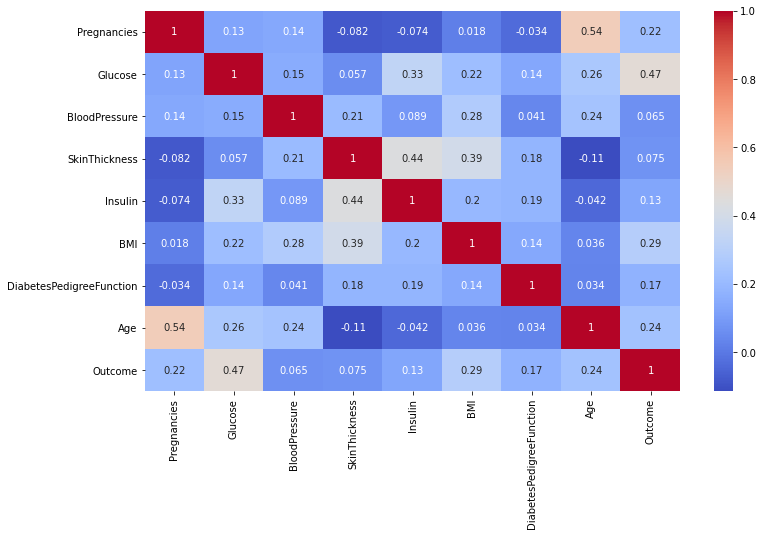

In [19]:
#Correlation
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(),annot = True, fmt = '.2g', cmap = 'coolwarm')

Glucose has high correlation with Outcome. Age and Pregnancies also have positive correlation with Age. (Greater is the age, higher is the chances of number of pregnancies).  

### DATA CLEANING

In [20]:
#Missing Values
#'Glucose','BloodPressure','SkinThickness','Insulin','BMI'
df['Glucose_cl'] = df['Glucose'].replace(0, df['Glucose'].mean())     

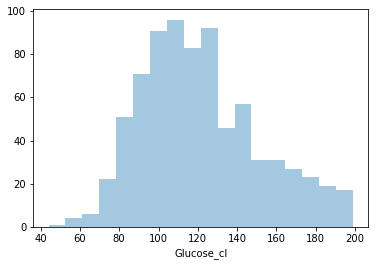

In [21]:
sns.distplot(df['Glucose_cl'],kde =False)

In [22]:
df['BloodPressure_cl'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness_cl'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['Insulin_cl'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['BMI_cl'] = df['BMI'].replace(0, df['BMI'].mean())

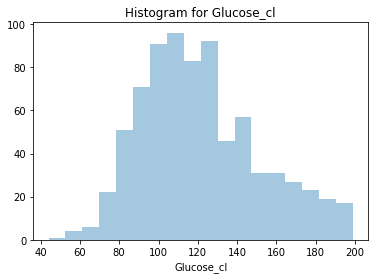

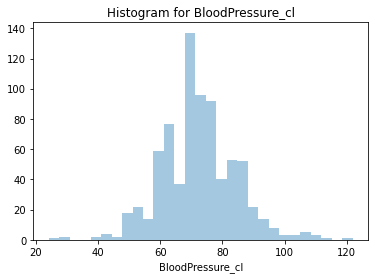

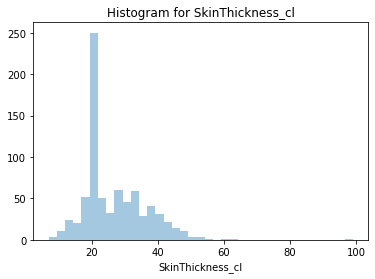

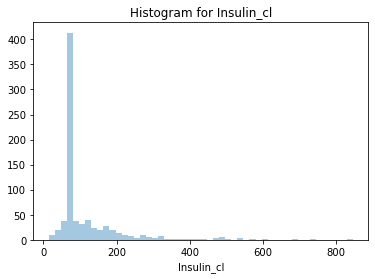

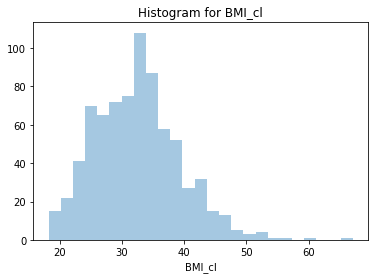

In [23]:
#Histogram
for cl_feature in ['Glucose_cl','BloodPressure_cl','SkinThickness_cl','Insulin_cl','BMI_cl']:
    sns.distplot(df[cl_feature],kde =False)
    plt.title('Histogram for {}'.format(cl_feature))
    plt.show()

In [24]:
#Detecting Outliers
def detect_outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std = np.std(data)
    
    for y in data:
        z_score = (y-mean)/std
        if np.abs(z_score)>3:
            outliers.append(y)
    print('\n Outlier caps for {}'.format(feature))
    print('__95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),len([i for i in data 
                                                                                 if i > data.quantile(.95)])))
    print('__3sd: {:.1f} / {} values exceed that'.format(mean+3*(std),len(outliers)))
    print('__99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),len([i for i in data 
                                                                                 if i > data.quantile(.99)])))

In [25]:
for fea in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age',
           'Glucose_cl','BloodPressure_cl','SkinThickness_cl','Insulin_cl','BMI_cl']:
    detect_outlier(fea)


 Outlier caps for Pregnancies
__95p: 10.0 / 34 values exceed that
__3sd: 13.9 / 4 values exceed that
__99p: 13.0 / 4 values exceed that

 Outlier caps for Glucose
__95p: 181.0 / 36 values exceed that
__3sd: 216.7 / 5 values exceed that
__99p: 196.0 / 6 values exceed that

 Outlier caps for BloodPressure
__95p: 90.0 / 38 values exceed that
__3sd: 127.1 / 35 values exceed that
__99p: 106.0 / 7 values exceed that

 Outlier caps for SkinThickness
__95p: 44.0 / 37 values exceed that
__3sd: 68.4 / 1 values exceed that
__99p: 51.3 / 8 values exceed that

 Outlier caps for Insulin
__95p: 293.0 / 38 values exceed that
__3sd: 425.3 / 18 values exceed that
__99p: 519.9 / 8 values exceed that

 Outlier caps for BMI
__95p: 44.4 / 39 values exceed that
__3sd: 55.6 / 14 values exceed that
__99p: 50.8 / 8 values exceed that

 Outlier caps for DiabetesPedigreeFunction
__95p: 1.1 / 39 values exceed that
__3sd: 1.5 / 11 values exceed that
__99p: 1.7 / 8 values exceed that

 Outlier caps for Age
__95p: 5

In [26]:
# clip()
for feat in ['Glucose_cl','BloodPressure_cl','SkinThickness_cl','Insulin_cl','BMI_cl']:
    df[feat].clip(upper = df[feat].quantile(.99),inplace = True)
df['Age_cl'] = df['Age'].clip(upper = df['Age'].quantile(.99))  
df['Preg_cl'] = df['Pregnancies'].clip(upper = df['Pregnancies'].quantile(.99))

In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_cl,BloodPressure_cl,SkinThickness_cl,Insulin_cl,BMI_cl,Age_cl,Preg_cl
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,121.669886,72.202723,26.503146,117.465111,32.394258,33.205729,3.834635
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,30.406983,11.949190,9.184085,86.312014,6.682040,11.645318,3.336808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,99.750000,64.000000,20.536458,79.799479,27.500000,24.000000,1.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,117.000000,72.000000,23.000000,79.799479,32.000000,29.000000,3.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,6.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,196.000000,106.000000,51.330000,519.900000,50.759000,67.000000,13.000000


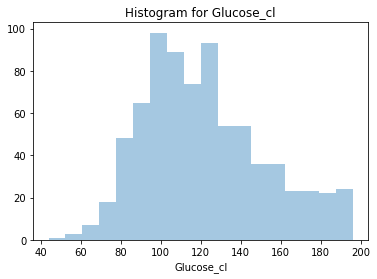

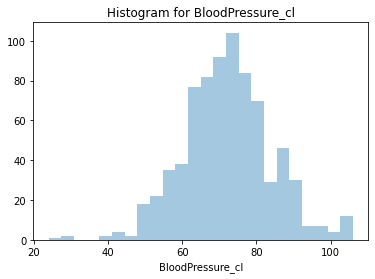

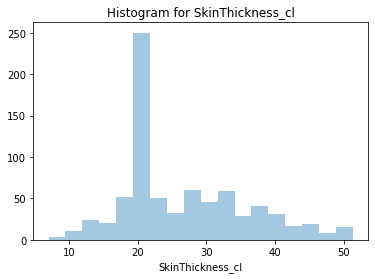

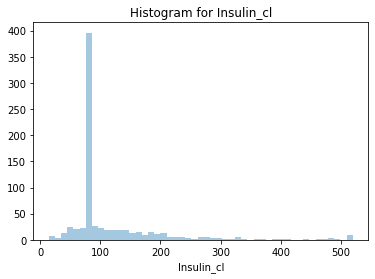

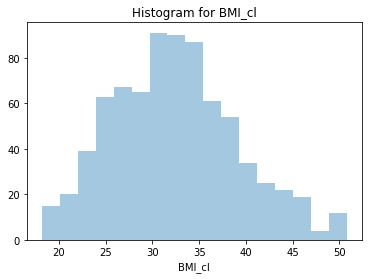

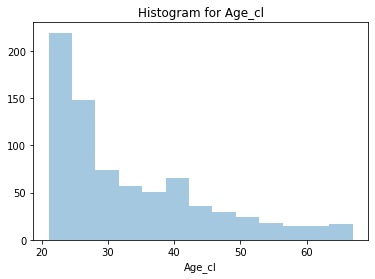

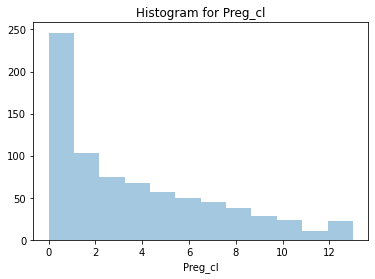

In [28]:
#Histogram
for cl_feature in ['Glucose_cl','BloodPressure_cl','SkinThickness_cl','Insulin_cl','BMI_cl','Age_cl','Preg_cl']:
    sns.distplot(df[cl_feature],kde =False)
    plt.title('Histogram for {}'.format(cl_feature))
    plt.show()

In [29]:
#Create an indicator column for Pregnancies
df['Preg_ind']= df['Preg_cl']
df['Preg_ind'].values[df['Preg_ind'] > 0] = 1
#df['Preg_ind'] = df['Preg_cl'].apply(lambda x: [1 if y > 0 else 0 for y in x])

In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_cl,BloodPressure_cl,SkinThickness_cl,Insulin_cl,BMI_cl,Age_cl,Preg_cl,Preg_ind
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,121.669886,72.202723,26.503146,117.465111,32.394258,33.205729,3.834635,0.855469
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,30.406983,11.949190,9.184085,86.312014,6.682040,11.645318,3.336808,0.351857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,99.750000,64.000000,20.536458,79.799479,27.500000,24.000000,1.000000,1.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,117.000000,72.000000,23.000000,79.799479,32.000000,29.000000,3.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,6.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,196.000000,106.000000,51.330000,519.900000,50.759000,67.000000,13.000000,1.000000


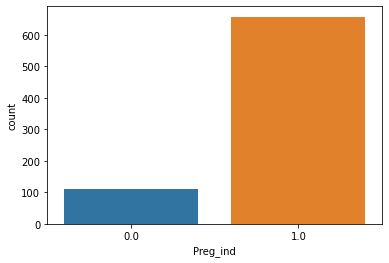

In [31]:
sns.countplot(x = 'Preg_ind',data = df)

### LOG TRANSFORMATION OF SKEWED DATA

In [32]:
# Applying Log Transformation on Age and Pregnancies
df['Age_tf']= np.log(df['Age_cl'])

In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_cl,BloodPressure_cl,SkinThickness_cl,Insulin_cl,BMI_cl,Age_cl,Preg_cl,Preg_ind,Age_tf
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,121.669886,72.202723,26.503146,117.465111,32.394258,33.205729,3.834635,0.855469,3.448309
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,30.406983,11.949190,9.184085,86.312014,6.682040,11.645318,3.336808,0.351857,0.321450
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,21.000000,0.000000,0.000000,3.044522
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,99.750000,64.000000,20.536458,79.799479,27.500000,24.000000,1.000000,1.000000,3.178054
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,117.000000,72.000000,23.000000,79.799479,32.000000,29.000000,3.000000,1.000000,3.367296
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,41.000000,6.000000,1.000000,3.713572
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,196.000000,106.000000,51.330000,519.900000,50.759000,67.000000,13.000000,1.000000,4.204693


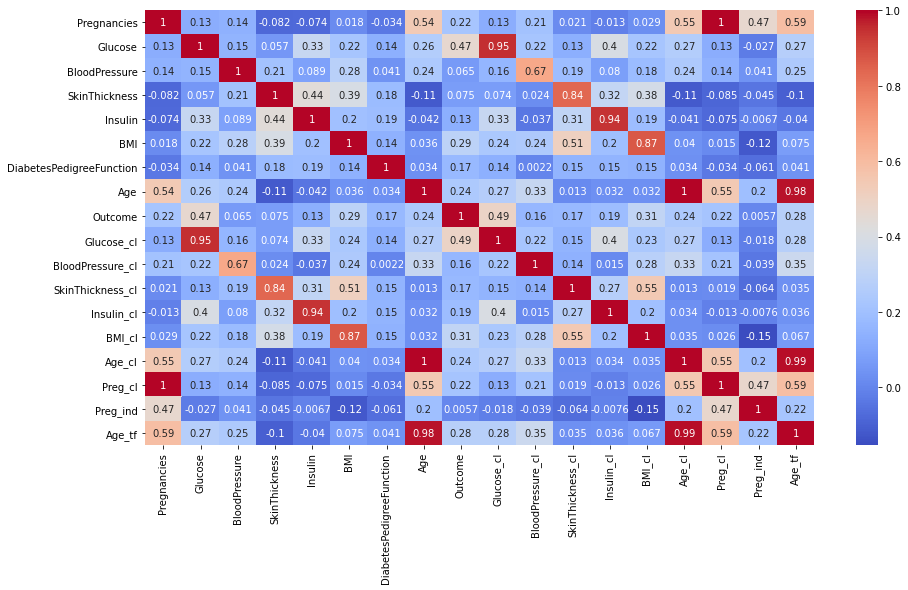

In [34]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot = True, fmt = '.2g', cmap = 'coolwarm')

In [35]:
df.columns.values.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Glucose_cl',
 'BloodPressure_cl',
 'SkinThickness_cl',
 'Insulin_cl',
 'BMI_cl',
 'Age_cl',
 'Preg_cl',
 'Preg_ind',
 'Age_tf']

### Splitting the data

In [36]:
from sklearn.model_selection import train_test_split
features = df.drop(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Outcome',
                   'Age','Age_cl',],axis = 1)
labels = df['Outcome']

X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size = 0.4,random_state = 101)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size = 0.5,random_state = 101)

In [37]:
for dataset in [y_train,y_val,y_test]:
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


In [38]:
features.describe()

,DiabetesPedigreeFunction,Glucose_cl,BloodPressure_cl,SkinThickness_cl,Insulin_cl,BMI_cl,Preg_cl,Preg_ind,Age_tf
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.471876,121.669886,72.202723,26.503146,117.465111,32.394258,3.834635,0.855469,3.448309
std,0.331329,30.406983,11.949190,9.184085,86.312014,6.682040,3.336808,0.351857,0.321450
min,0.078000,44.000000,24.000000,7.000000,14.000000,18.200000,0.000000,0.000000,3.044522
25%,0.243750,99.750000,64.000000,20.536458,79.799479,27.500000,1.000000,1.000000,3.178054
50%,0.372500,117.000000,72.000000,23.000000,79.799479,32.000000,3.000000,1.000000,3.367296
75%,0.626250,140.250000,80.000000,32.000000,127.250000,36.600000,6.000000,1.000000,3.713572
max,2.420000,196.000000,106.000000,51.330000,519.900000,50.759000,13.000000,1.000000,4.204693


### SCALING

In [39]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [40]:
#Fit the scaler on train data
Scaler.fit(X_train)

StandardScaler()

In [41]:
#Scaler transform training, validation and test sets
features = X_train.columns
X_train[features]= Scaler.transform(X_train[features])
X_val[features]= Scaler.transform(X_val[features])
X_test[features]= Scaler.transform(X_test[features])

### MODELS

Since we need a Binary Target Classification,I have used Logistic Regression, Random Forests, Boosting.
Logistic Regresssion was used as a basic benchmark model. 

### LOGISTIC REGRESSION

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [43]:
def Print_results(results):
    print('Best Params: {} \n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,results.cv_results_['params']):
        print('{}(+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [44]:
LR = LogisticRegression()
LR_parameters = {'C':[0.001,0.01,0.1,1,10,100]}
LR_cv = GridSearchCV(LR,LR_parameters,cv = 5)
LR_cv.fit(X_train,y_train.values.ravel())
Print_results(LR_cv)

Best Params: {'C': 0.1} 

0.648(+/-0.011) for {'C': 0.001}
0.757(+/-0.092) for {'C': 0.01}
0.77(+/-0.071) for {'C': 0.1}
0.765(+/-0.051) for {'C': 1}
0.77(+/-0.052) for {'C': 10}
0.77(+/-0.052) for {'C': 100}


In [45]:
LR_cv.best_estimator_

LogisticRegression(C=0.1)

## Next Steps
1. EDA -Check for outliers using visualization - boxplot, qq plot, scatterplot.
2. EDA - Check for distribution in all the features - if it has skewed data, should i apply transformation?
3. Get Heatmap
4. This is an unbalanced data. What changes should I do to get good results
5. What other models can be used for prediction?
6. If this data has outliers and skewed data, use SVM model also since the dataset is small.

### RANDOM FORESTS

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
RF = RandomForestClassifier()
RF_parameters = {'n_estimators':[5,50,250],'max_depth':[2,4,8,16,32,None]}
RF_cv = GridSearchCV(RF,RF_parameters,cv = 5)
RF_cv.fit(X_train,y_train)
Print_results(RF_cv)

Best Params: {'max_depth': None, 'n_estimators': 250} 

0.743(+/-0.101) for {'max_depth': 2, 'n_estimators': 5}
0.763(+/-0.095) for {'max_depth': 2, 'n_estimators': 50}
0.761(+/-0.094) for {'max_depth': 2, 'n_estimators': 250}
0.761(+/-0.13) for {'max_depth': 4, 'n_estimators': 5}
0.767(+/-0.097) for {'max_depth': 4, 'n_estimators': 50}
0.77(+/-0.129) for {'max_depth': 4, 'n_estimators': 250}
0.72(+/-0.064) for {'max_depth': 8, 'n_estimators': 5}
0.772(+/-0.084) for {'max_depth': 8, 'n_estimators': 50}
0.767(+/-0.096) for {'max_depth': 8, 'n_estimators': 250}
0.704(+/-0.069) for {'max_depth': 16, 'n_estimators': 5}
0.75(+/-0.075) for {'max_depth': 16, 'n_estimators': 50}
0.763(+/-0.078) for {'max_depth': 16, 'n_estimators': 250}
0.739(+/-0.077) for {'max_depth': 32, 'n_estimators': 5}
0.765(+/-0.092) for {'max_depth': 32, 'n_estimators': 50}
0.754(+/-0.085) for {'max_depth': 32, 'n_estimators': 250}
0.724(+/-0.134) for {'max_depth': None, 'n_estimators': 5}
0.765(+/-0.084) for {'max_de

In [48]:
RF_cv.best_estimator_

RandomForestClassifier(n_estimators=250)

### GRADIENT BOOSTING 

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
GB = GradientBoostingClassifier()
GB_parameters = {'n_estimators':[5,50,250,500],'max_depth':[1,3,5,7,9],'learning_rate':[0.01,0.1,1,10,100]}
GB_cv = GridSearchCV(GB,GB_parameters,cv=5)
GB_cv.fit(X_train,y_train)
Print_results(GB_cv)

Best Params: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250} 

0.648(+/-0.011) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.676(+/-0.077) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.752(+/-0.116) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.763(+/-0.101) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.648(+/-0.011) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.73(+/-0.05) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.763(+/-0.093) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.763(+/-0.076) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.648(+/-0.011) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.709(+/-0.081) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.739(+/-0.09) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.746(+/-0.103) for {'learning_rate': 0.01, 'm

In [51]:
GB_cv.best_estimator_

GradientBoostingClassifier(max_depth=1, n_estimators=250)

### VALIDATION

In [52]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
from time import time

In [53]:
def evaluate_model(name,model,features,labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels,pred),3)
    precision = round(precision_score(labels,pred),3)
    recall = round(recall_score(labels,pred),3)
    print('{}--Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,accuracy,precision,
                                                                                recall,round((end-start),3)))

In [54]:
dict = {'Logistic Regression':LR_cv,'RandomForest': RF_cv,'GradientBoosting': GB_cv}
for name,mdl in dict.items() :
    evaluate_model(name,mdl,X_val,y_val)

Logistic Regression--Accuracy: 0.76 / Precision: 0.696 / Recall: 0.582 / Latency: 0.001ms
RandomForest--Accuracy: 0.766 / Precision: 0.679 / Recall: 0.655 / Latency: 0.045ms
GradientBoosting--Accuracy: 0.786 / Precision: 0.712 / Recall: 0.673 / Latency: 0.002ms


In [55]:
### TESTING

In [58]:
evaluate_model('GradientBoosting',GB_cv,X_test,y_test)

GradientBoosting--Accuracy: 0.734 / Precision: 0.586 / Recall: 0.667 / Latency: 0.003ms
